In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [2]:
df = pd.read_csv(r"C:\Users\João Varella\OneDrive\Área de Trabalho\Programação\Treina Recife - Análise de dados\wine_dataset.csv",sep=',') 

In [3]:
df

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,style
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  style                 6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [5]:
df['quality'] = df['quality'].astype('category')
X = df.copy()
X.drop('style', axis=1,inplace=True)
X = pd.get_dummies(X)
y = df['style']
print(X)
print(y)

      fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0               7.4              0.70         0.00             1.9      0.076   
1               7.8              0.88         0.00             2.6      0.098   
2               7.8              0.76         0.04             2.3      0.092   
3              11.2              0.28         0.56             1.9      0.075   
4               7.4              0.70         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
6492            6.2              0.21         0.29             1.6      0.039   
6493            6.6              0.32         0.36             8.0      0.047   
6494            6.5              0.24         0.19             1.2      0.041   
6495            5.5              0.29         0.30             1.1      0.022   
6496            6.0              0.21         0.38             0.8      0.020   

      free_sulfur_dioxide  

In [6]:
y.value_counts()

white    4898
red      1599
Name: style, dtype: int64

In [7]:
models = []
models.append(['LR', LogisticRegression(solver='newton-cg')])
models.append(['KNN', KNeighborsClassifier(n_neighbors=1)])
models.append(['CART', DecisionTreeClassifier(max_depth=3,random_state=42)])
models.append(['NB', GaussianNB()])
models.append(['SVM', SVC()])

In [8]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, random_state=7)

In [9]:
num_folds = 10
scoring = 'accuracy'

In [10]:
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds)
    cv_results = cross_val_score(model, X_treino, y_treino, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)


LR: 0.984993 (0.004364)
KNN: nan (nan)


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 136, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 86, in _cached_call
    result, _ = _get_response_values(
                ^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\_response.py", line 85, in _get_response_values
    y_pred = prediction_method(X)
             ^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\

CART: 0.971912 (0.008556)
NB: 0.933619 (0.012718)
SVM: 0.934390 (0.012748)


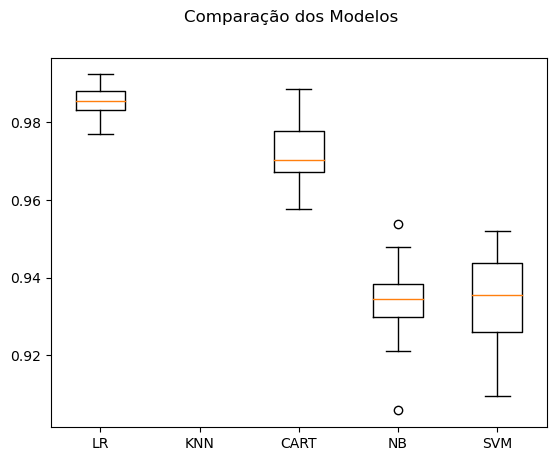

In [11]:
fig = plt.figure()
fig.suptitle('Comparação dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [12]:
scaler = StandardScaler().fit(X_treino)
rescaledX = scaler.transform(X_treino)

k = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21]
distancias = ['euclidean', 'manhattan', 'minkowski']
param_grid = dict(n_neighbors=k, metric=distancias)

model = KNeighborsClassifier()
kfold = KFold(n_splits=num_folds)

grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, y_treino)
print("Melhor: %f usando %s" %(grid_result.best_score_, grid_result.best_params_))

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print('%f (%f): %r' % (mean, stdev, param))

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py

Melhor: 0.991726 usando {'metric': 'euclidean', 'n_neighbors': 1}
0.991726 (0.003655): {'metric': 'euclidean', 'n_neighbors': 1}
0.991342 (0.003571): {'metric': 'euclidean', 'n_neighbors': 3}
0.991149 (0.004403): {'metric': 'euclidean', 'n_neighbors': 5}
0.990572 (0.004507): {'metric': 'euclidean', 'n_neighbors': 7}
0.989995 (0.005001): {'metric': 'euclidean', 'n_neighbors': 9}
0.990187 (0.005122): {'metric': 'euclidean', 'n_neighbors': 11}
0.989226 (0.006093): {'metric': 'euclidean', 'n_neighbors': 13}
0.988456 (0.006081): {'metric': 'euclidean', 'n_neighbors': 15}
0.987879 (0.006022): {'metric': 'euclidean', 'n_neighbors': 17}
0.987110 (0.006263): {'metric': 'euclidean', 'n_neighbors': 19}
0.985956 (0.005302): {'metric': 'euclidean', 'n_neighbors': 21}
nan (nan): {'metric': 'manhattan', 'n_neighbors': 1}
nan (nan): {'metric': 'manhattan', 'n_neighbors': 3}
nan (nan): {'metric': 'manhattan', 'n_neighbors': 5}
nan (nan): {'metric': 'manhattan', 'n_neighbors': 7}
nan (nan): {'metric': '

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:976: UserWarning: One or more of the test scores are non-finite: [0.99172632 0.99134171 0.99114903 0.99057211 0.98999481 0.99018712
 0.98922558 0.98845635 0.98787943 0.98710983 0.98595561        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan 0.99172632 0.99134171
 0.99114903 0.99057211 0.98999481 0.99018712 0.98922558 0.98845635
 0.98787943 0.98710983 0.98595561]
  warnings.warn(


In [13]:
c_values = [0.1, 0.5, 1.0, 1.5, 2.0]
kernel_values = ['linear', 'poly', 'rbf', 'sigmoid']
param_grid = dict(C=c_values, kernel=kernel_values)

model = SVC()
kfold = KFold(n_splits=num_folds)

grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, y_treino)
print("Melhor: %f com %s" % (grid_result.best_score_,grid_result.best_params_))

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f): %r "% (mean, stdev, param))

Melhor: 0.995574 com {'C': 1.0, 'kernel': 'rbf'}
0.992880 (0.001937): {'C': 0.1, 'kernel': 'linear'} 
0.972292 (0.003863): {'C': 0.1, 'kernel': 'poly'} 
0.988840 (0.003308): {'C': 0.1, 'kernel': 'rbf'} 
0.989224 (0.002614): {'C': 0.1, 'kernel': 'sigmoid'} 
0.994034 (0.002353): {'C': 0.5, 'kernel': 'linear'} 
0.989032 (0.002990): {'C': 0.5, 'kernel': 'poly'} 
0.994420 (0.002500): {'C': 0.5, 'kernel': 'rbf'} 
0.977680 (0.005174): {'C': 0.5, 'kernel': 'sigmoid'} 
0.994226 (0.002725): {'C': 1.0, 'kernel': 'linear'} 
0.993651 (0.003336): {'C': 1.0, 'kernel': 'poly'} 
0.995574 (0.001934): {'C': 1.0, 'kernel': 'rbf'} 
0.974600 (0.006544): {'C': 1.0, 'kernel': 'sigmoid'} 
0.994226 (0.002725): {'C': 1.5, 'kernel': 'linear'} 
0.993843 (0.002692): {'C': 1.5, 'kernel': 'poly'} 
0.995189 (0.001973): {'C': 1.5, 'kernel': 'rbf'} 
0.971523 (0.004014): {'C': 1.5, 'kernel': 'sigmoid'} 
0.994418 (0.002650): {'C': 2.0, 'kernel': 'linear'} 
0.993843 (0.002826): {'C': 2.0, 'kernel': 'poly'} 
0.995189 (0.001

Accuracy score =  0.9923076923076923


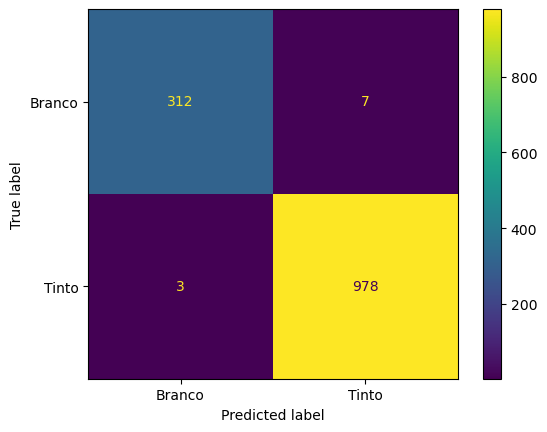

              precision    recall  f1-score   support

      Branco       0.99      0.98      0.98       319
       Tinto       0.99      1.00      0.99       981

    accuracy                           0.99      1300
   macro avg       0.99      0.99      0.99      1300
weighted avg       0.99      0.99      0.99      1300



In [14]:
model = LogisticRegression(solver='newton-cg')
model.fit(X_treino, y_treino)

predictions = model.predict(X_teste)
print("Accuracy score = ", accuracy_score(y_teste, predictions))

# Matriz de confusão
cm = confusion_matrix(y_teste, predictions)
labels = ["Branco", "Tinto"]
cmd = ConfusionMatrixDisplay(cm, display_labels=labels)
cmd.plot(values_format="d")
plt.show()
print(classification_report(y_teste, predictions, target_names=labels))

# Tabela de Métrica
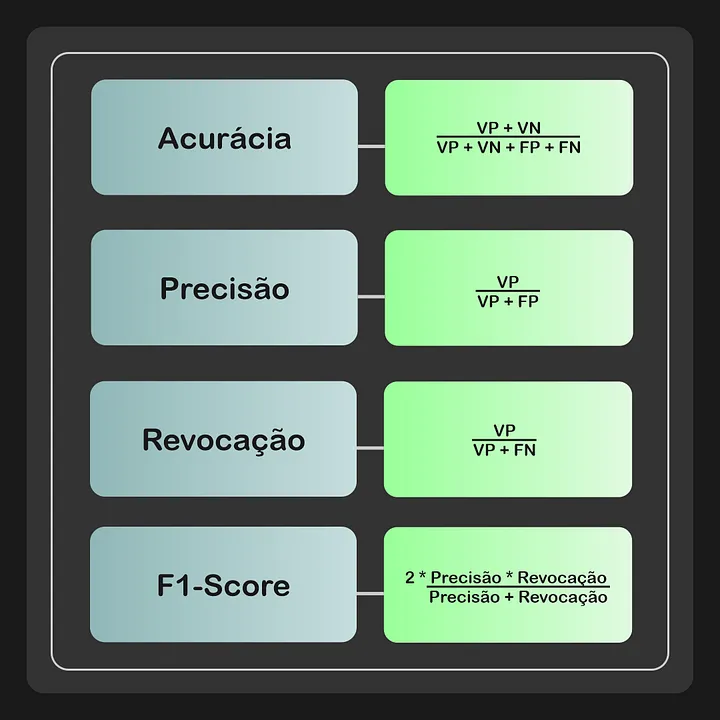

A precisão pode ser usada em uma situação em que os Falsos Positivos são considerados mais prejudiciais que os Falsos Negativos. Por exemplo, ao classificar uma ação como um bom investimento, é necessário que o modelo esteja correto, mesmo que acabe classificando bons investimentos como maus investimentos (situação de Falso Negativo) no processo. Ou seja, o modelo deve ser preciso em suas classificações, pois a partir do momento que consideramos um investimento bom quando na verdade ele não é, uma grande perda de dinheiro pode acontecer.

O recall pode ser usada em uma situação em que os Falsos Negativos são considerados mais prejudiciais que os Falsos Positivos. Por exemplo, o modelo deve de qualquer maneira encontrar todos os pacientes doentes, mesmo que classifique alguns saudáveis como doentes (situação de Falso Positivo) no processo. Ou seja, o modelo deve ter alto recall, pois classificar pacientes doentes como saudáveis pode ser uma tragédia.

O F1-Score é simplesmente uma maneira de observar somente 1 métrica ao invés de duas (precisão e recall) em alguma situação. É uma média harmônica entre as duas, que está muito mais próxima dos menores valores do que uma média aritmética simples. Ou seja, quando tem-se um F1-Score baixo, é um indicativo de que ou a precisão ou o recall está baixo.

In [15]:
X.corr()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality_3,quality_4,quality_5,quality_6,quality_7,quality_8,quality_9
fixed_acidity,1.000000,0.219008,0.324436,-0.111981,0.298195,-0.282735,-0.329054,0.458910,-0.252700,0.299568,-0.095452,0.033522,0.010526,0.060234,-0.025834,-0.029724,-0.051301,0.004382
volatile_acidity,0.219008,1.000000,-0.377981,-0.196011,0.377124,-0.352557,-0.414476,0.271296,0.261454,0.225984,-0.037640,0.073368,0.133258,0.212489,-0.137954,-0.137888,-0.051714,-0.007024
citric_acid,0.324436,-0.377981,1.000000,0.142451,0.038998,0.133126,0.195242,0.096154,-0.329808,0.056197,-0.010493,-0.017640,-0.059113,-0.052589,0.029979,0.049540,0.016745,0.012866
residual_sugar,-0.111981,-0.196011,0.142451,1.000000,-0.128940,0.402871,0.495482,0.552517,-0.267320,-0.185927,-0.359415,-0.004341,-0.050266,0.053125,0.019706,-0.066745,-0.002219,-0.007719
chlorides,0.298195,0.377124,0.038998,-0.128940,1.000000,-0.195045,-0.279630,0.362615,0.044708,0.395593,-0.256916,0.040829,0.021290,0.172576,-0.047149,-0.137091,-0.074470,-0.022684
free_sulfur_dioxide,-0.282735,-0.352557,0.133126,0.402871,-0.195045,1.000000,0.720934,0.025717,-0.145854,-0.188457,-0.179838,0.033354,-0.103325,-0.011363,0.031723,-0.002594,0.039517,0.004495
total_sulfur_dioxide,-0.329054,-0.414476,0.195242,0.495482,-0.279630,0.720934,1.000000,0.032395,-0.238413,-0.275727,-0.265740,0.007579,-0.040397,0.063129,-0.005198,-0.057214,0.005491,0.000125
density,0.458910,0.271296,0.096154,0.552517,0.362615,0.025717,0.032395,1.000000,0.011686,0.259478,-0.686745,0.023791,0.008411,0.269154,-0.040594,-0.233773,-0.127394,-0.029957
pH,-0.252700,0.261454,-0.329808,-0.267320,0.044708,-0.145854,-0.238413,0.011686,1.000000,0.192123,0.121248,0.016592,0.015133,-0.027495,-0.004244,0.026567,0.005128,0.015449
sulphates,0.299568,0.225984,0.056197,-0.185927,0.395593,-0.188457,-0.275727,0.259478,0.192123,1.000000,-0.003029,-0.011414,-0.031931,-0.022899,0.007578,0.047258,-0.022086,-0.012173
